# RA2CE: Do It Yourself

Now let's do it yourself!

First do your imports

In [ ]:
import geopandas as gpd
from pathlib import Path

Create a folder for your project following the RA2CE folder structure. Then, apply some basic settings. Keep in mind that you will have to specify the path to your local machine yourself.

In [ ]:
from ra2ce.ra2ce_handler import Ra2ceHandler #import the ra2cehandler to run ra2ce analyses

_network_ini_name = "your input goes here" # set the name for the network.ini
_analysis_ini_name = "your input goes here" # set the name for the analysis.ini

In [ ]:
folder_dir = Path(r'') #Set the path to the folders where you will store your RA2CE project folders

#PS: mind the folder structure!

## Folder structure

Make sure you have the correct folder structure and that the files you want to use are in the right folder. Otherwise, RA2CE will not be able to find the correct files to use.

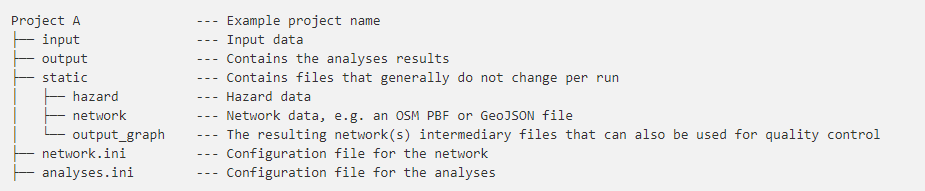

## Configuring a road network from OSM

First, we will need to specify the area for which you want to download your road network.
Therefore, create a .geojson polgyon which you save in the network folder.
Set the **CRS to WGS84 EPSG:4326** (this is also the standard geojson CRS).

Specify the way in which you want to create your road network in the network.ini
In this example we will use OSM download. 
Download the road network until **tertiary** roads, or if you want to use a larger area, only extract the motorways (also use the links!)

> [project]<br>
name = beira<br>
<br>
[network]<br>
directed = False<br>
**source = ...<br>**
primary_file = None<br>
diversion_file = None<br>
file_id = rfid_c<br>
**polygon = ...<br>**
network_type = drive<br>
**road_types = ...<br>**
save_gpkg = True<br>
<br>

Now, we tell the program where to find our project folder (by specifying the path to the project folder). The network initialisation file (network.ini) is of interest. Now that we introduced a polygon of a region, we specified the road types and that we want an OSM download, RA2CE can perform this action for us. 

In [ ]:
root_dir = folder_dir / "" #name of the folder which you created for your ra2ce analysis

network_ini = root_dir / _network_ini_name #we set the network_ini_name before, so we can use this now for the project
assert network_ini.is_file() #check whether there is a network.ini

Run the RA2CE analyses by inputting the right arguments.<br>
Do you need both the network and analysis ini?

In [ ]:
handler = Ra2ceHandler(network=..., analysis=...)
handler.configure()

Now, inspect your created network!

In [ ]:
#Set the path to YOUR output_graph folder to find the network/graph creation:
path_output_graph = root_dir/" "/" "

Load in the file you are interested in (for example the edges or the nodes). <br>
If you are more comfortable in a GIS, you can also load your data there.<br> 
Notice the different files in the output_graph folder. Inspect them all and see what their differences are.

In [ ]:
#your code goes here

Have you checked whether the network is nicely connected together? The disconnected islands plugin in QGIS is great help for this!

## Single redundancy test

Now, let's perform a single redundancy test for your area of interest! Perform the analysis in the same folder as in which you created your graph. In this way, you can use the created road network for this analysis.<br>

*You can also create a new folder and extract a network and perform the analysis from scratch if you want to get more advanced*

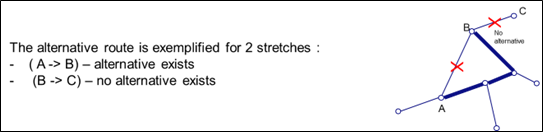

Put the following arguments in the analysis.ini

> [project] <br>
name = beira <br>
 <br>
[analysis1] <br>
name = beira_redundancy <br>
analysis = single_link_redundancy <br>
weighing = distance <br>
save_gpkg = True <br>
save_csv = True <br>

Run RA2CE 

In [ ]:
analysis_ini = root_dir / _analysis_ini_name
assert analysis_ini.is_file()
handler = Ra2ceHandler(network=..., analysis=...)
handler.configure()
handler.run_analysis()

Let's check your output!

In [ ]:
analysis_output_folder = root_dir/" "/" " #specify path to output folder and the folder which holds the results

Inspect the contents of the output

In [ ]:
#use gdf.head()

Read in the results. <br>
What are the redundancy options for your network? 

In [ ]:
#Your code goes here

What is the difference between the alternative route and the original route? <br>


*(hint: you can use the column diff_dist)*

In [ ]:
#Your code goes here

## Level up: you're now an emergency responder

For this analysis you need a flood map in your region. 
You can for example download one from the Global Flood Database or find a synthetic flood map for your area

Put the flood map in the right folder for RA2CE and specify its parameters in the network.ini<br>
Don't forget to specify the projection!

Inspect your flood map here or in a GIS:

In [ ]:
#your code goes here

Run RA2CE and perform the hazard overlay on the roads by running the network.ini file

In [ ]:
#your code goes here

Inspect which roads are affected by the flood 

In [ ]:
#your code goes here

Create origins and destinations data for your area of interest. Use the tips and requirements in the example material to create suitable files for RA2CE.

*It is easiest to do the processing in a GIS*

Inspect your created files. Do they contain all the right columns and are they in the right projection?

In [ ]:
#inspect

Initialize the network.ini with your created origins and destinations and the right column names

Initialize the analysis.ini with the analysis of interest. Specify the right parameters

Now you are ready to run RA2CE again!

In [ ]:
#your code goes here

Inspect which origins still have access to one of their closest destinations:

In [ ]:
#your code goes here

How many people do not have acces to their closest destination? 

(hint: there are also summary output files in your output folder)